<b>Data Preparation</b> </br> TODO

<b>Add GITHUB automated cloning code.</b> </br> TODO

In [1]:
# all libraries import 
import pandas as pd
import numpy as np
import requests
import json
from datetime import datetime
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline

mpl.rcParams['figure.figsize']=(16, 9)

pd.set_option('display.max_rows', 500)

In [2]:
data_path = '../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
data_csv = pd.read_csv(data_path)
print(len(data_csv))

285


In [5]:
data_csv.head(2)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/10/22,6/11/22,6/12/22,6/13/22,6/14/22,6/15/22,6/16/22,6/17/22,6/18/22,6/19/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,180864,180864,180864,181120,181178,181236,181465,181534,181574,181666
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,276638,276690,276731,276731,276821,276821,276821,277141,277141,277409


<b>Analysis:</b> 

1. Total number of data columns = 880 </br>
2. Data for 3 months = 70 i.e. 20 days data per month. </br>
3. Corona cases are present for each and every day starting from 22.Jan.2020 all the days. </br> 
4. Total 199 countries data is present. 

In [6]:
print("Total number of days ", len(data_csv.columns[4:]))
print("Total unique countries count: ",len(data_csv['Country/Region'].unique()))

# 3 months data selected only.
time_idx = data_csv.columns[4:74]
print(time_idx)

Total number of days  880
Total unique countries count:  199
Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/2/20',
       '2/3/20', '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20', '2/9/20',
       '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20', '2/15/20',
       '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20', '2/21/20',
       '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20', '2/27/20',
       '2/28/20', '2/29/20', '3/1/20', '3/2/20', '3/3/20', '3/4/20', '3/5/20',
       '3/6/20', '3/7/20', '3/8/20', '3/9/20', '3/10/20', '3/11/20', '3/12/20',
       '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20', '3/18/20',
       '3/19/20', '3/20/20', '3/21/20', '3/22/20', '3/23/20', '3/24/20',
       '3/25/20', '3/26/20', '3/27/20', '3/28/20', '3/29/20', '3/30/20',
       '3/31/20'],
      dtype='object')


In [7]:
#convert string date to datetime object:
converted_time_idx = [datetime.strptime(each_date,"%m/%d/%y") for each_date in time_idx]
df_plot = pd.DataFrame({'date':converted_time_idx})
print(df_plot.head())

        date
0 2020-01-22
1 2020-01-23
2 2020-01-24
3 2020-01-25
4 2020-01-26


In [8]:
data_csv[data_csv['Country/Region']=='US'].iloc[:, 4:].sum(axis=0)

1/22/20           1
1/23/20           1
1/24/20           2
1/25/20           2
1/26/20           5
             ...   
6/15/22    85942237
6/16/22    86058228
6/17/22    86216418
6/18/22    86230982
6/19/22    86246101
Length: 880, dtype: int64

In [9]:
country_list = ["India", "Germany", "Sweden", "France", "Belgium"]

In [10]:
for country in country_list:
    print("Country - ", country)
    print("Number of rows - ", len(data_csv[data_csv['Country/Region'] == country ].iloc[:, 4:74]))
    # print(type(data_csv[data_csv['Country/Region'] == country ].iloc[:, 4:74].sum(axis=0)))
    print(np.array(data_csv[data_csv['Country/Region'] == country ].iloc[:, 4:74].sum(axis=0)))
    df_plot[country] = np.array(data_csv[data_csv['Country/Region'] == country ].iloc[:, 4:74].sum(axis=0))
    print("-------------")

Country -  India
Number of rows -  1
[   0    0    0    0    0    0    0    0    1    1    1    2    3    3
    3    3    3    3    3    3    3    3    3    3    3    3    3    3
    3    3    3    3    3    3    3    3    3    3    3    3    5    5
   28   30   31   34   39   43   56   62   73   82  102  113  119  142
  156  194  244  330  396  499  536  657  727  887  987 1024 1251 1397]
-------------
Country -  Germany
Number of rows -  1
[    0     0     0     0     0     1     4     4     4     5     8    10
    12    12    12    12    13    13    14    14    16    16    16    16
    16    16    16    16    16    16    16    16    16    16    16    21
    26    53    66   117   150   188   240   349   534   684   847  1112
  1296  1567  2369  3062  3795  4838  6012  7156  8198 10999 13957 16662
 18610 22672 27436 31554 36508 42288 48582 52547 57298 61913]
-------------
Country -  Sweden
Number of rows -  1
[   0    0    0    0    0    0    0    0    0    0    1    1    1    1
    

In [11]:
df_plot

,date,India,Germany,Sweden,France,Belgium
0,2020-01-22,0,0,0,0,0
1,2020-01-23,0,0,0,0,0
2,2020-01-24,0,0,0,2,0
3,2020-01-25,0,0,0,3,0
4,2020-01-26,0,0,0,3,0
5,2020-01-27,0,1,0,3,0
6,2020-01-28,0,4,0,4,0
7,2020-01-29,0,4,0,5,0
8,2020-01-30,1,4,0,5,0
9,2020-01-31,1,5,0,5,0


<AxesSubplot:xlabel='date'>

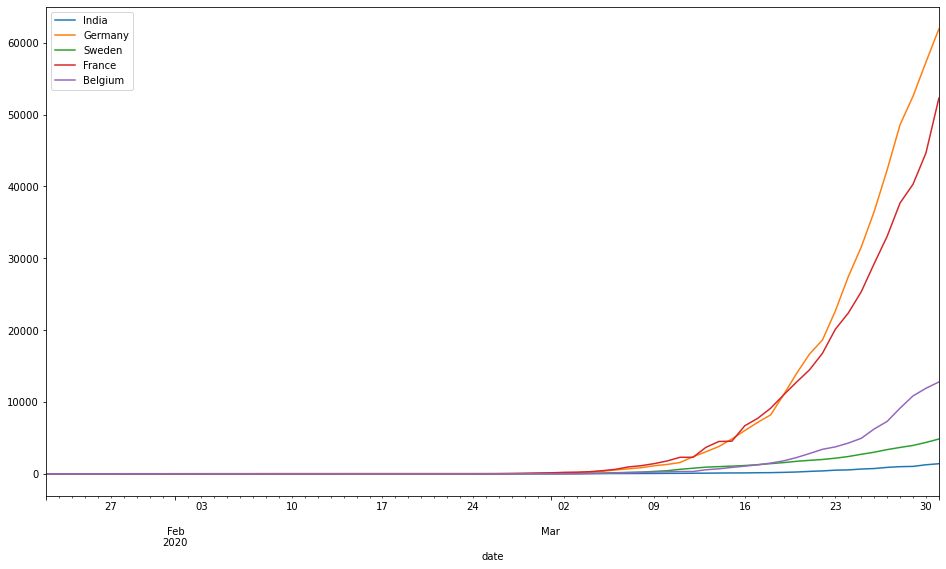

In [17]:
df_plot.set_index('date').plot()

In [140]:
path_to_save_processed_df = '../data/processed/COVID_small_flat_table.csv'
df_plot.to_csv(path_to_save_processed_df, sep=';')

<b>Relation Dataset</b>

In [166]:
# load data from csv file
data_path = '../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
data_csv = pd.read_csv(data_path)
print(len(data_csv))

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '6/10/22', '6/11/22', '6/12/22', '6/13/22', '6/14/22', '6/15/22',
       '6/16/22', '6/17/22', '6/18/22', '6/19/22'],
      dtype='object', length=884)


In [167]:
relational_data = data_csv.rename(columns={'Country/Region':'country',
                                          'Province/State':'state'})
relational_data['state'] = relational_data['state'].fillna('no')
relational_data = relational_data.drop(['Lat','Long'], axis=1)
relational_data.head()

,state,country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,6/10/22,6/11/22,6/12/22,6/13/22,6/14/22,6/15/22,6/16/22,6/17/22,6/18/22,6/19/22
0,no,Afghanistan,0,0,0,0,0,0,0,0,...,180864,180864,180864,181120,181178,181236,181465,181534,181574,181666
1,no,Albania,0,0,0,0,0,0,0,0,...,276638,276690,276731,276731,276821,276821,276821,277141,277141,277409
2,no,Algeria,0,0,0,0,0,0,0,0,...,265925,265925,265927,265937,265943,265952,265964,265968,265971,265975
3,no,Andorra,0,0,0,0,0,0,0,0,...,43224,43224,43224,43224,43224,43449,43449,43449,43449,43449
4,no,Angola,0,0,0,0,0,0,0,0,...,99761,99761,99761,99761,99761,99761,99761,99761,99761,99761


In [168]:
relational_data = relational_data.set_index(['state','country']).T
relational_data

state            no                                            \
country Afghanistan Albania Algeria Andorra Angola Antarctica   
1/22/20           0       0       0       0      0          0   
1/23/20           0       0       0       0      0          0   
1/24/20           0       0       0       0      0          0   
1/25/20           0       0       0       0      0          0   
1/26/20           0       0       0       0      0          0   
...             ...     ...     ...     ...    ...        ...   
6/15/22      181236  276821  265952   43449  99761         11   
6/16/22      181465  276821  265964   43449  99761         11   
6/17/22      181534  277141  265968   43449  99761         11   
6/18/22      181574  277141  265971   43449  99761         11   
6/19/22      181666  277409  265975   43449  99761         11   

state                                         Australian Capital Territory  \
country Antigua and Barbuda Argentina Armenia                    Australia   
1/22/20                   0         0       0                            0   
1/23/20                   0         0       0                            0   
1/24/20                   0         0       0                            0   
1/25/20                   0         0       0                            0   
1/26/20                   0         0       0                            0   
...                     ...       ...     ...                          ...   
6/15/22                8537   9313453  423044                       143656   
6/16/22                8537   9313453  423044                       144597   
6/17/22                8555   9313453  423044                       145457   
6/18/22                8581   9313453  423044                       146264   
6/19/22                8581   9341492  423044                       147096   

state    ...      no                                         \
country  ... Uruguay Uzbekistan Vanuatu Venezuela   Vietnam   
1/22/20  ...       0          0       0         0         0   
1/23/20  ...       0          0       0         0         2   
1/24/20  ...       0          0       0         0         2   
1/25/20  ...       0          0       0         0         2   
1/26/20  ...       0          0       0         0         2   
...      ...     ...        ...     ...       ...       ...   
6/15/22  ...  943877     239319   10757    524370  10734151   
6/16/22  ...  943877     239376   10791    524488  10734925   
6/17/22  ...  943877     239435   10856    524718  10736408   
6/18/22  ...  943877     239525   10857    524823  10737107   
6/19/22  ...  943877     239525   10924    524911  10737640   

state                                                                    
country West Bank and Gaza Winter Olympics 2022  Yemen  Zambia Zimbabwe  
1/22/20                  0                    0      0       0        0  
1/23/20                  0                    0      0       0        0  
1/24/20                  0                    0      0       0        0  
1/25/20                  0                    0      0       0        0  
1/26/20                  0                    0      0       0        0  
...                    ...                  ...    ...     ...      ...  
6/15/22             658100                  535  11822  323654   254387  
6/16/22             658100                  535  11822  323654   254502  
6/17/22             658100                  535  11823  324025   254753  
6/18/22             658100                  535  11823  324025   254753  
6/19/22             658100                  535  11823  324288   254801  

[880 rows x 285 columns]

In [170]:
# make date, state, country as columns in dataframe.
relational_data = relational_data.stack(level=[0,1]).reset_index()

In [173]:
#rename columns 
relational_data = relational_data.rename(columns={'level_0':'date',0:'confirmed'})

In [177]:
relational_data['date'] = relational_data.date.astype('datetime64[ns]')

In [178]:
relational_data

,date,state,country,confirmed
0,2020-01-22,Alberta,Canada,0.0
1,2020-01-22,Anguilla,United Kingdom,0.0
2,2020-01-22,Anhui,China,1.0
3,2020-01-22,Aruba,Netherlands,0.0
4,2020-01-22,Australian Capital Territory,Australia,0.0
...,...,...,...,...
250795,2022-06-19,no,West Bank and Gaza,658100.0
250796,2022-06-19,no,Winter Olympics 2022,535.0
250797,2022-06-19,no,Yemen,11823.0
250798,2022-06-19,no,Zambia,324288.0


In [179]:
path_to_save_processed_df = '../data/processed/COVID_relational_confirmed.csv'
relational_data.to_csv(path_to_save_processed_df, sep=';')